# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem.porter import PorterStemmer
import string 
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df=pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Renaming the columns
df.columns=["target","text"]

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Label Encoding
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

There are no missing values

In [14]:
# Cheching for duplicated values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df=df.drop_duplicates(keep="first")

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

ham (0) has more records than spam(1)

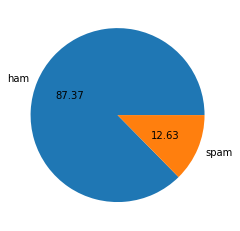

In [19]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

Data is imbalanced

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Counting number of characters in each text
df["num_charachters"]=df["text"].apply(len)

In [22]:
# Number of wordds
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
# Number of sentences
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_charachters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[["num_charachters","num_words","num_sentences"]].describe()

,num_charachters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham
df[df.target==0][["num_charachters","num_words","num_sentences"]].describe()

,num_charachters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam
df[df.target==1][["num_charachters","num_words","num_sentences"]].describe()

,num_charachters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_charachters', ylabel='Count'>

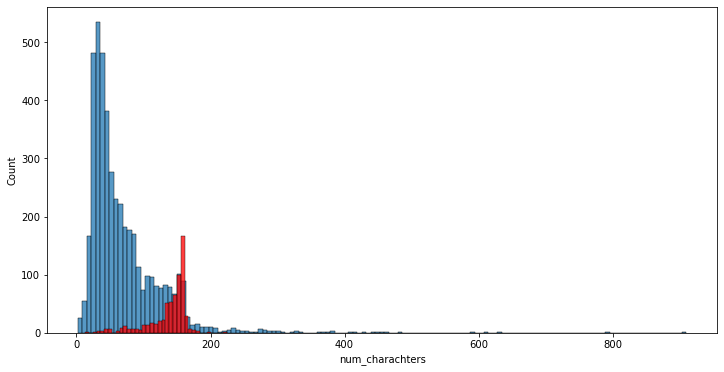

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==0]["num_charachters"])
sns.histplot(df[df.target==1]["num_charachters"],color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

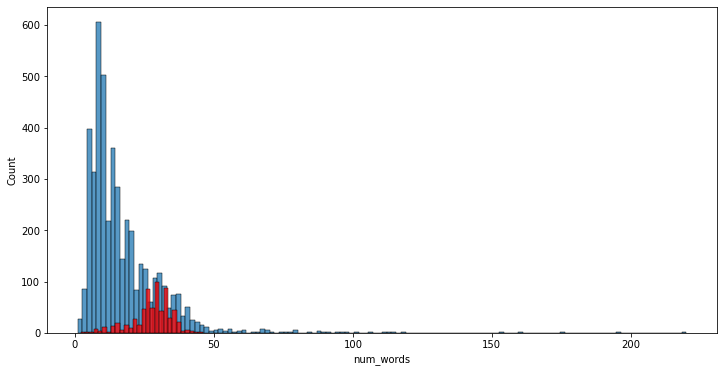

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==0]["num_words"])
sns.histplot(df[df.target==1]["num_words"],color="red")

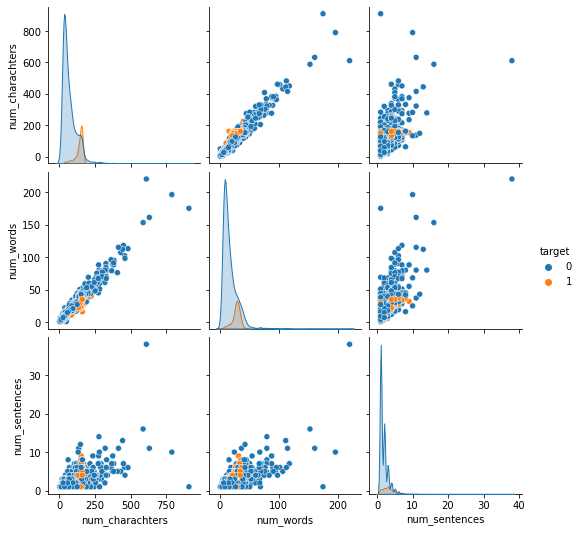

In [30]:
sns.pairplot(df,hue="target")

<AxesSubplot:>

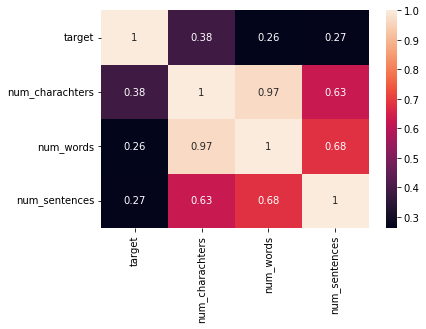

In [31]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

. Lower case

. Tokinization

. Removing Special characters

. Removing stop words and puncuation 

. Stemming

In [32]:
# Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Removing puncuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower() #Lower Case
    text = nltk.word_tokenize(text) #Tokinization
#Removing Special characters:
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
#Removing stop words and puncuation:         
    text=y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
transform_text("Did You Like my presentation *")

'like present'

In [44]:
ps.stem("playing")

'play'

In [45]:
df["transformed_text"]=df["text"].apply(transform_text)

In [46]:
df.head()

,target,text,num_charachters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus=[]
for msg in df[df.target==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


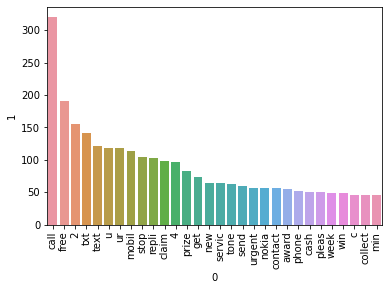

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [51]:
ham_corpus=[]
for msg in df[df.target==0]["transformed_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [52]:
len(ham_corpus)

35402

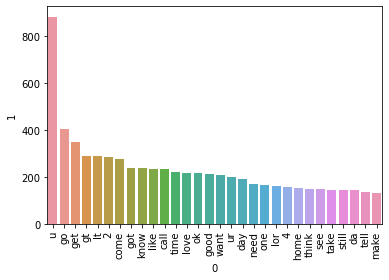

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

# Model Building

CountVectorizer class:converts a collection of text documents into a matrix of token counts, where each row represents a document and each column represents a unique token in the document collection.This makes it easy to directly use this representation as features (signals) in Machine Learning tasks


In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [98]:
X=cv.fit_transform(df["transformed_text"]).toarray()
y=df["target"].values

In [99]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
X.shape

(5169, 6708)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [104]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [105]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_gnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_gnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_gnb))

accuracy_score: 0.8800773694390716
____________
confusion_matrix: [[792 104]
 [ 20 118]]
____________
precision_score: 0.5315315315315315


In [106]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_mnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_mnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_mnb))

accuracy_score: 0.9642166344294004
____________
confusion_matrix: [[871  25]
 [ 12 126]]
____________
precision_score: 0.8344370860927153


In [107]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_bnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_bnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_bnb))

accuracy_score: 0.9700193423597679
____________
confusion_matrix: [[893   3]
 [ 28 110]]
____________
precision_score: 0.9734513274336283


In [108]:
X=Tfidf.fit_transform(df["transformed_text"]).toarray()
y=df["target"].values

In [109]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
X.shape

(5169, 3000)

In [111]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [112]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_gnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_gnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_gnb))

accuracy_score: 0.8694390715667312
____________
confusion_matrix: [[788 108]
 [ 27 111]]
____________
precision_score: 0.5068493150684932


In [113]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_mnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_mnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_mnb))

accuracy_score: 0.9709864603481625
____________
confusion_matrix: [[896   0]
 [ 30 108]]
____________
precision_score: 1.0


In [114]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred_bnb))
print("____________")
print("confusion_matrix:",confusion_matrix(y_test,y_pred_bnb))
print("____________")
print("precision_score:",precision_score(y_test,y_pred_bnb))

accuracy_score: 0.9835589941972921
____________
confusion_matrix: [[895   1]
 [ 16 122]]
____________
precision_score: 0.991869918699187


In [72]:
# tfidf --> MNB

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [118]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [119]:
clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [120]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [121]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [122]:
accuracy_scores = []
precision_scores = []

for name,clfs in clf.items():
    
    current_accuracy,current_precision = train_classifier(clfs,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [123]:
performance_df = pd.DataFrame({'Algorithm':clf.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(['Precision',"Accuracy"],ascending=False)

In [124]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970986,1.000000
1,KN,0.905222,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


Random Forest has the highest Precision and Accuracy

In [125]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [126]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,KN,Accuracy,0.905222
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


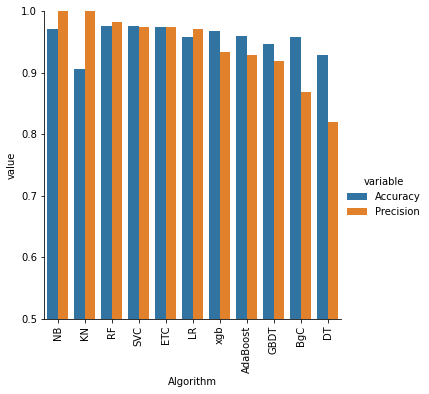

In [127]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

In [138]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [140]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [143]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))